In [1]:
import numpy as np
import pandas as pd
from sklearn import feature_extraction, linear_model, model_selection, preprocessing
import matplotlib.pyplot as plt

train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

In [2]:
#what does the data look like

train_df.iloc[:1,:]


,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1


In [3]:
# what do disaster tweets looke like

disasters = train_df[train_df["target"]==1]
disasters.iloc[:2,:]

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1


In [4]:
#what do non disaster tweets look like
print ("non_disaster tweet")
non_disasters = train_df[train_df["target"]==0]
non_disasters.iloc[:2,:]

non_disaster tweet


,id,keyword,location,text,target
15,23,NaN,NaN,What's up man?,0
16,24,NaN,NaN,I love fruits,0


In [5]:
print('There are {} rows and {} columns in train dataset'.format(train_df.shape[0],train_df.shape[1]))
print('There are {} rows and {} columns in test dataset'.format(test_df.shape[0],test_df.shape[1]))

There are 7613 rows and 5 columns in train dataset
There are 3263 rows and 4 columns in test dataset


In [6]:
# how many disaster and non-disaster tweets there are in the material
dis_twts = train_df[train_df['target'] == 1].shape[0]
non_dis_twts = train_df[train_df['target'] == 0].shape[0]
print ("disaster tweets {} and non-disaster tweets {}".format(dis_twts, non_dis_twts))

disaster tweets 3271 and non-disaster tweets 4342


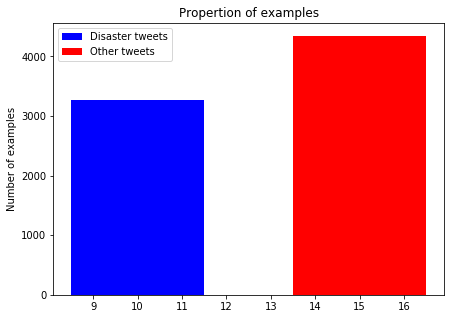

In [7]:
#visualize the amounts
# bar plot of the 3 classes
plt.rcParams['figure.figsize'] = (7, 5)
plt.bar(10,dis_twts,3, label="Disaster tweets", color='blue')
plt.bar(15,non_dis_twts,3, label="Other tweets", color='red')
plt.legend()
plt.ylabel('Number of examples')
plt.title('Propertion of examples')
plt.show()

In [26]:
def lenni(text):    
    '''a function which returns the length of text'''
    return len(text)

train_df['length'] = train_df['text'].apply(lenni)

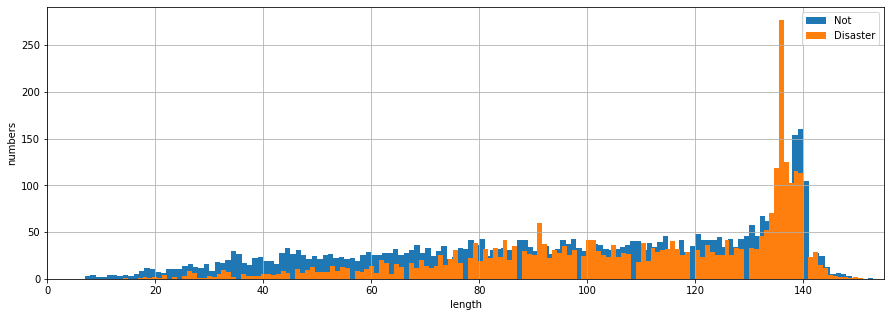

In [27]:
#very short tweets are non-diaster, disaster tweets tend to be longer
# but it is hard to see this from the figure as non-disaster tweets might be behind
plt.rcParams['figure.figsize'] = (15.0, 5.0)
bins = 150
plt.hist(train_df[train_df['target'] == 0]['length'],  bins=bins, label='Not')
plt.hist(train_df[train_df['target'] == 1]['length'],  bins=bins, label='Disaster')
plt.xlabel('length')
plt.ylabel('numbers')
plt.xlim(0,155)
plt.legend(loc='upper right')
plt.grid()
plt.show()

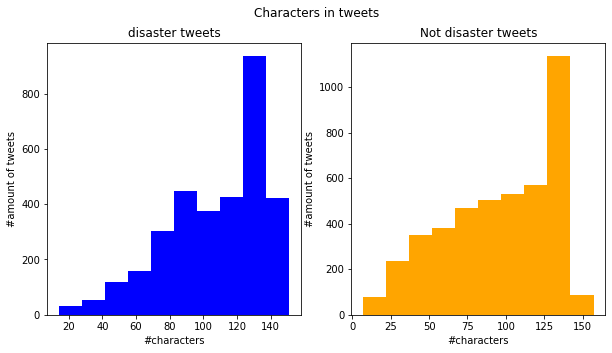

In [28]:
#lets check the lenghts side by side

fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10,5))
tweet_len=train_df[train_df['target']==1]['text'].str.len()
ax1.hist(tweet_len,color='blue')
ax1.set_title('disaster tweets')
ax1.set_ylabel('#amount of tweets')
ax1.set_xlabel('#characters')
tweet_len=train_df[train_df['target']==0]['text'].str.len()
ax2.hist(tweet_len,color='orange')
ax2.set_title('Not disaster tweets')
ax2.set_ylabel('#amount of tweets')
ax2.set_xlabel('#characters')
fig.suptitle('Characters in tweets')
plt.show()

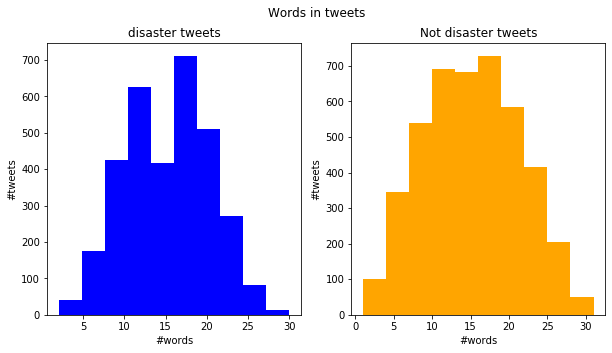

In [29]:
#number of words in disaster and non-disaster tweets. Is there a difference?

fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10,5))
tweet_words=train_df[train_df['target']==1]['text'].str.split().map(lambda x: len(x))
ax1.hist(tweet_words,color='blue')
ax1.set_title('disaster tweets')
ax1.set_ylabel('#tweets')
ax1.set_xlabel('#words')
tweet_words=train_df[train_df['target']==0]['text'].str.split().map(lambda x: len(x))
ax2.hist(tweet_words,color='orange')
ax2.set_title('Not disaster tweets')
ax2.set_ylabel('#tweets')
ax2.set_xlabel('#words')
fig.suptitle('Words in tweets')
plt.show()

In [46]:
#lets analyze what types of words are in the tweets
def create_corpus(target):
    corpus=[]
    
    for x in train_df[train_df['target']==target]['text'].str.split():
        for i in x:
            corpus.append(i)
    return corpus

def create_corpus_df(all_df, target):
    corpus=[]
    
    for x in all_df[all_df['target']==target]['text'].str.split():
        for i in x:
            corpus.append(i)
    return corpus

stopwords in disaster tweets {'i', 'shan', 'been', 'yourselves', 'when', 'has', 'them', "aren't", "couldn't", 'or', 'again', 'so', "mustn't", 'the', 'they', 'didn', 'mightn', 'too', "should've", 'we', 'don', 'be', 'aren', 'shouldn', 'an', 'were', 'wasn', 'because', 'she', 'very', 'won', "you're", 'during', 'before', "it's", 'now', 'below', 'did', 'between', 'is', 'o', 'haven', 'are', 'only', 'down', 'yourself', 'do', 'any', 'this', 'myself', 'all', 'than', 'hadn', "that'll", 'not', 'should', 'some', 'nor', 'both', 'other', 'weren', 'on', 'for', 'what', 'no', "haven't", 't', "wasn't", 'where', 'from', "weren't", 'our', 'its', 'herself', 'mustn', 'him', 'does', 'that', 'against', 'until', 'into', 'you', "hadn't", 'out', 're', 'at', 'wouldn', "shouldn't", 'such', 'whom', 'hasn', "you'd", "didn't", 'he', 'in', 'over', 'm', "isn't", "wouldn't", 'just', 'isn', 'those', 'it', 'here', 'theirs', 'up', 'why', 'needn', 'couldn', "she's", 'having', 'her', 'which', 'have', 'through', 've', 'about',

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/marttiylikoski/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


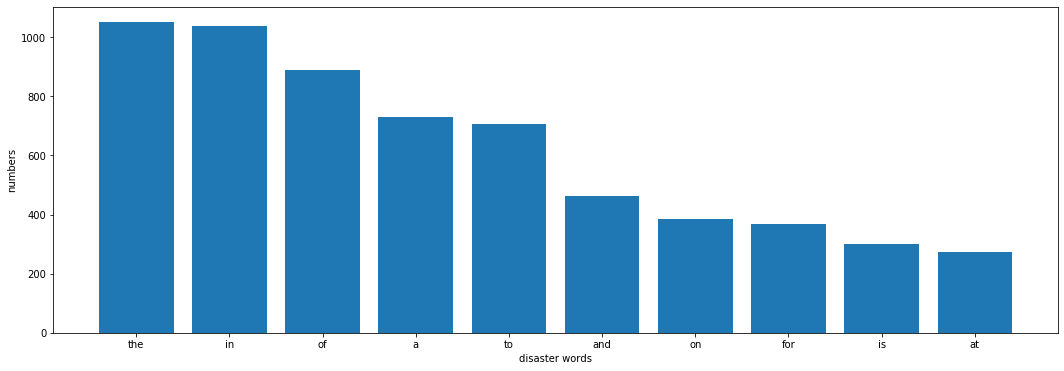

stopwords in non-disaster tweets {'i', 'shan', 'been', 'yourselves', 'when', 'has', 'them', "aren't", "couldn't", 'or', 'again', 'so', "mustn't", 'the', 'they', 'didn', 'mightn', 'too', "should've", 'we', 'don', 'be', 'aren', 'shouldn', 'an', 'were', 'wasn', 'because', 'she', 'very', 'won', "you're", 'during', 'before', "it's", 'now', 'below', 'did', 'between', 'is', 'o', 'haven', 'are', 'only', 'down', 'yourself', 'do', 'any', 'this', 'myself', 'all', 'than', 'hadn', "that'll", 'not', 'should', 'some', 'nor', 'both', 'other', 'weren', 'on', 'for', 'what', 'no', "haven't", 't', "wasn't", 'where', 'from', "weren't", 'our', 'its', 'herself', 'mustn', 'him', 'does', 'that', 'against', 'until', 'into', 'you', "hadn't", 'out', 're', 'at', 'wouldn', "shouldn't", 'such', 'whom', 'hasn', "you'd", "didn't", 'he', 'in', 'over', 'm', "isn't", "wouldn't", 'just', 'isn', 'those', 'it', 'here', 'theirs', 'up', 'why', 'needn', 'couldn', "she's", 'having', 'her', 'which', 'have', 'through', 've', 'abo

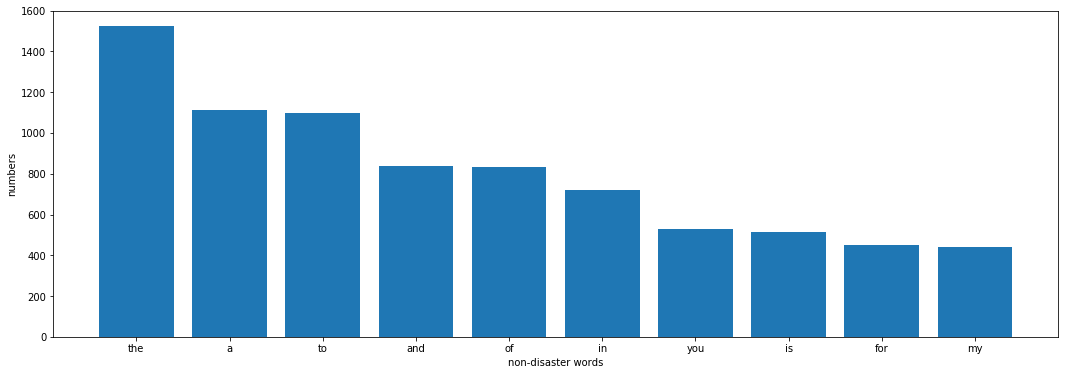

In [31]:
#look at stopwords in the tweets

import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
from collections import defaultdict
from collections import Counter

stop=set(stopwords.words('english'))

def stopword_analysis(corpus, explanation, xlab, ylab="numbers"):
    corpus=create_corpus(corpus)
    dic=defaultdict(int)
    for word in corpus:
        if word in stop:
            dic[word]+=1
        
    top=sorted(dic.items(), key=lambda x:x[1],reverse=True)[:10]
    print (explanation,np.array(stop))

    plt.rcParams['figure.figsize'] = (18.0, 6.0)
    x,y=zip(*top)
    plt.xlabel(xlab)
    plt.ylabel(ylab)
    plt.bar(x,y)
    plt.show()

stopword_analysis(1, "stopwords in disaster tweets", "disaster words")
stopword_analysis(0, "stopwords in non-disaster tweets", "non-disaster words")


!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


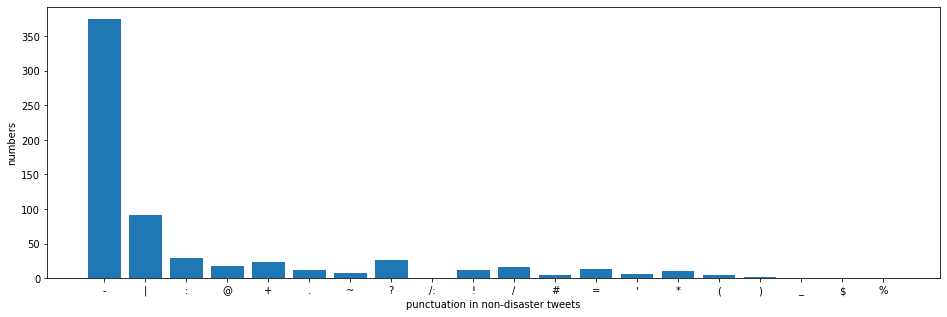

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


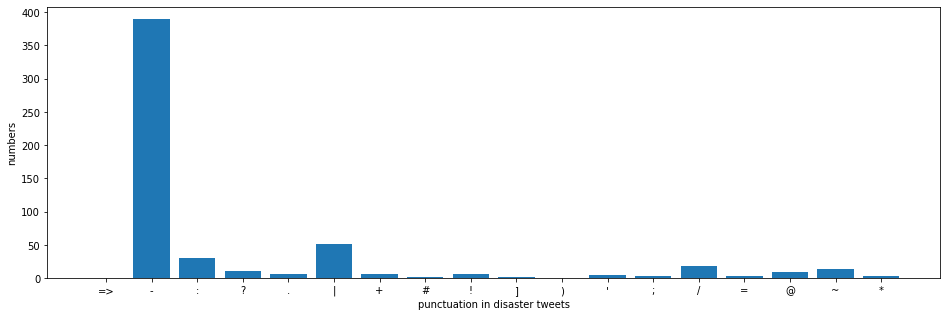

In [32]:
#lets check how much there are punctuations
import string
def show_punctuations(corpus, xlab, ylab="numbers"):
    plt.figure(figsize=(16,5))
    corpus=create_corpus(corpus)

    dic=defaultdict(int)
    special = string.punctuation
    print(special)
    for i in (corpus):
        if i in special:
            dic[i]+=1
        
    x,y=zip(*dic.items())
    plt.xlabel(xlab)
    plt.ylabel(ylab)
    plt.bar(x,y)
    plt.show()
    
show_punctuations(0,"punctuation in non-disaster tweets")
show_punctuations(1,"punctuation in disaster tweets")


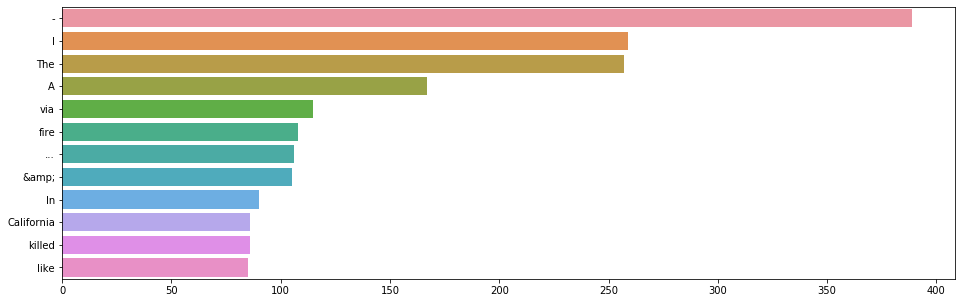

In [33]:
#what are the common words in disaster tweets
import seaborn as sns
plt.figure(figsize=(16,5))
corpus=create_corpus(1)
counter=Counter(corpus)
most=counter.most_common()
x=[]
y=[]
for word,count in most[:40]:
    if (word not in stop) :
        x.append(word)
        y.append(count)

sns.barplot(x=y,y=x)
#seems there is lots stopwords and some punctuations that do not help in text categorization

In [34]:
%run DataClenser.ipynb



Dillindallin
Daalia 
getting started

What shall we do today zequestion
haa  


In [35]:
# lets add all tweets (train and test) together and see how clensing changes it
all_df=pd.concat([train_df,test_df])
all_df.shape


/Users/marttiylikoski/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


(10876, 6)

In [36]:
print(all_df.columns)
all_df['text'] = all_df['text'].apply(lambda x: text_clense(x))

print (all_df.text[1])

Index(['id', 'keyword', 'length', 'location', 'target', 'text'], dtype='object')
1                Forest fire near La Ronge Sask Canada
1    Heard about earthquake is different cities sta...
Name: text, dtype: object


wordcloud for disaster tweets
46269
['Our', 'Deeds', 'are', 'the', 'Reason', 'of', 'this', 'earthquake', 'May', 'ALLAH']


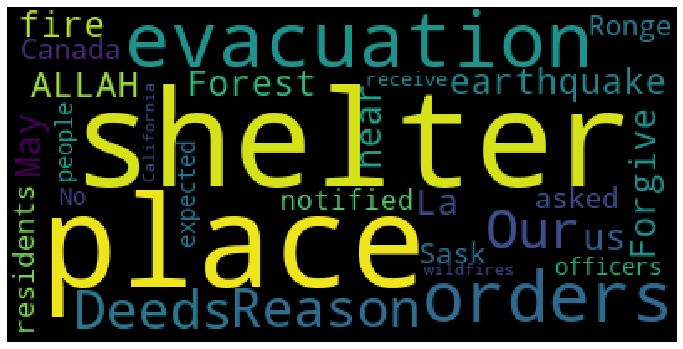

wordcloud for other tweets
60478
['Whats', 'up', 'man', 'I', 'love', 'fruits', 'Summer', 'is', 'lovely', 'My']


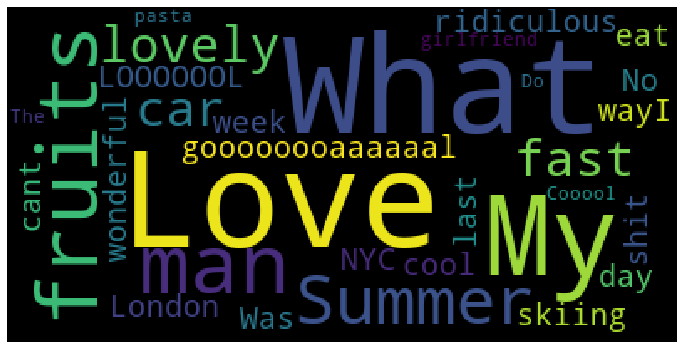

In [50]:
#lets check what are common words in disaster tweets in clensed data
from wordcloud import WordCloud

def tweet_word_cloud (all_df, target):
    corpus_new=create_corpus_df(all_df,target)
    print (len(corpus_new))
    print (corpus_new[:10])
    # Generating the wordcloud with the values under the category dataframe
    plt.figure(figsize=(12,8))
    word_cloud = WordCloud(
        background_color='black',
        max_font_size = 80).generate(" ".join(corpus_new[:50]))
    plt.imshow(word_cloud)
    plt.axis('off')
    plt.show()

print ("wordcloud for disaster tweets")
tweet_word_cloud(all_df,1)

print ("wordcloud for other tweets")
tweet_word_cloud(all_df,0)

                      